# DIGITAL ASSIGNMENT-2 

__SAMRIDDHI VERMA__                                               
__16BCE1375__                                                     
__SLOT:G1__

__DATASET SOURCE: <https://data.world/databeats/seeds>__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading data
data = pd.read_csv("seeds_dataset.csv")

__The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.
Attribute Information:__

__area A,
perimeter P,
compactness C = 4piA/P^2,
length of kernel,
width of kernel,
asymmetry coefficient
length of kernel groove. All of these parameters were real-valued continuous.__

In [3]:
data.head()

,ID,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,1,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,2,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,3,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,4,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,5,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
data.drop(['ID'], axis = 1, inplace = True)
labels = data['seedType']
del data['seedType']


In [5]:
data.head()

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [6]:
data=data.describe()

In [7]:
data.transpose()

,count,mean,std,min,25%,50%,75%,max
area,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
perimeter,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
compactness,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
lengthOfKernel,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
widthOfKernel,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
asymmetryCoefficient,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
lengthOfKernelGroove,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [8]:
data.isnull().sum()

area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
dtype: int64

__We see that there are no null/missing values in the dataset.__

__Performing PCA:__

In [9]:
from sklearn.decomposition import PCA
X = PCA(n_components = 2).fit_transform(data)

__Visualising:__

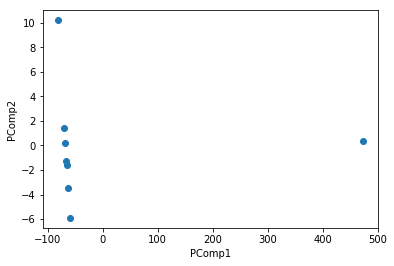

In [10]:
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('PComp1')
plt.ylabel('PComp2')
plt.show()

# K-MEANS

__Using elbow method ,we find the optimal number of clusters for this dataset__

In [11]:
from sklearn.cluster import KMeans
distortions = []
for i in range(1,9):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)

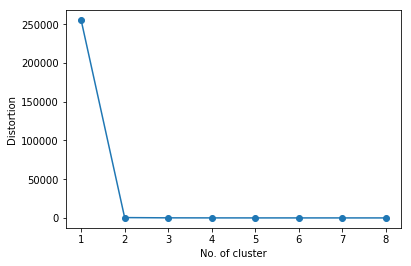

In [12]:
plt.plot(range(1, 9), distortions, marker = 'o')
plt.xlabel('No. of cluster')
plt.ylabel('Distortion')
plt.show()

__Performing KMeans with 3 clusters and visualising the results__

In [13]:
km = KMeans(n_clusters = 3,
                init = 'k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 0)
y_km = km.fit_predict(X)

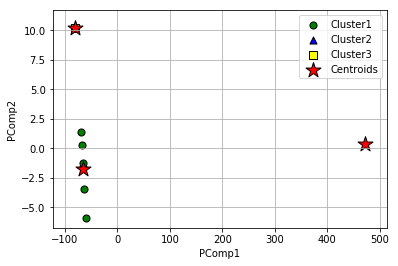

In [14]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s = 50,
            c = 'Green',
            marker = 'o',
            edgecolor = 'black',
            label = 'Cluster1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s = 50,
            c = 'Blue',
            marker = '^',
            edgecolor = 'black',
            label = 'Cluster2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s = 50,
            c = 'Yellow',
            marker = 's',
            edgecolor = 'black',
            label = 'Cluster3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s = 250,
            c = 'red',
            marker = '*',
            edgecolor = 'black',
            label = 'Centroids')
plt.xlabel('PComp1')
plt.ylabel('PComp2')
plt.legend()
plt.grid()
plt.show()

# Agglomerative Clustering (AGNES) 

__This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.__

In [15]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

__We will plot dendrogram for the dataset to find optimal number of clusters.__

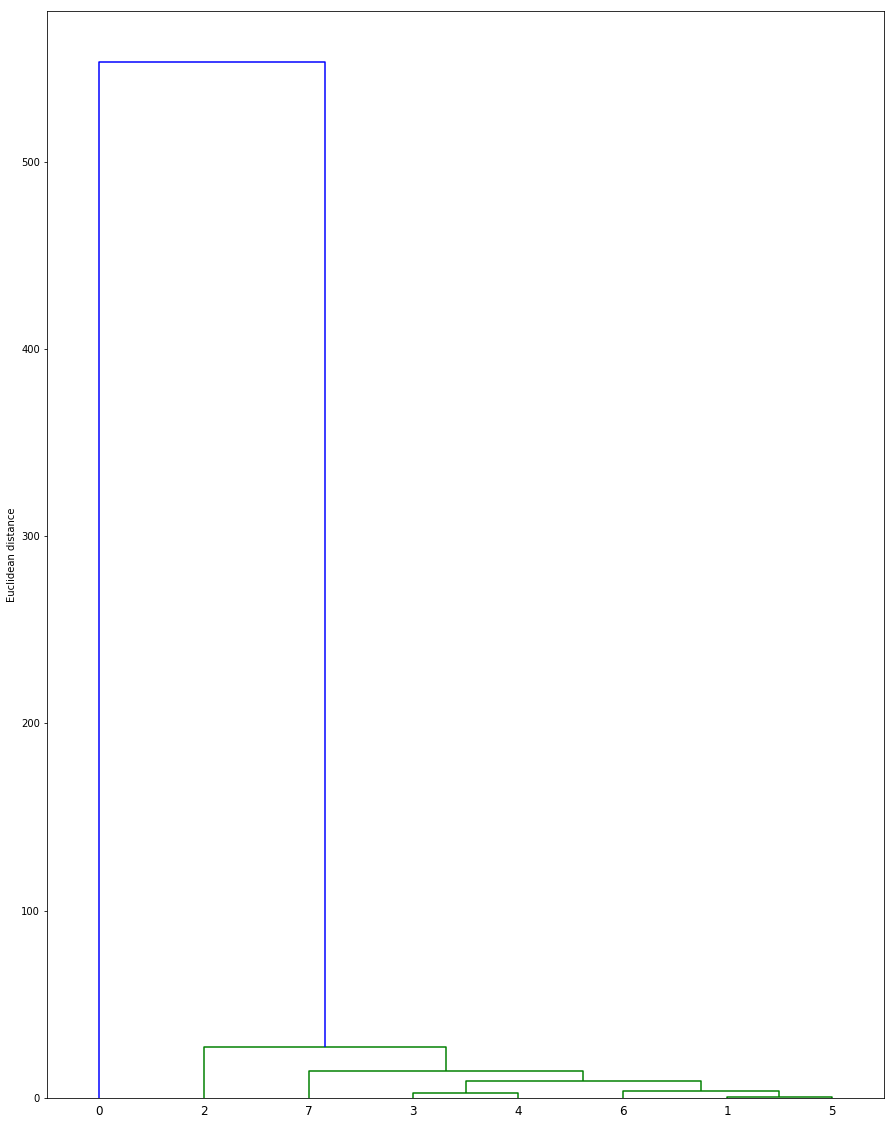

In [16]:
row_clusters = linkage(data.values,
                       method = 'complete',
                       metric = 'euclidean')
plt.figure(figsize = (15, 20))
row_dendr = dendrogram(row_clusters)
plt.ylabel('Euclidean distance')
plt.show()

__We can conclude that the optimal number of clusters is 3.__

__Performing AGNES for 3 clusters and visualising it.__

In [17]:
from sklearn.cluster import AgglomerativeClustering


In [18]:
agnes = AgglomerativeClustering(n_clusters = 3,
                             linkage = 'complete',
                             affinity = 'euclidean')
labels = agnes.fit_predict(X)

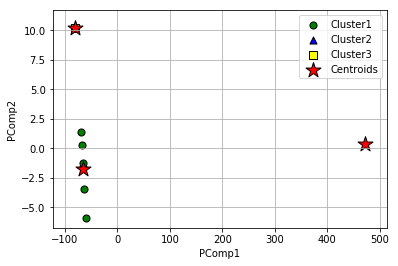

In [19]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s = 50,
            c = 'Green',
            marker = 'o',
            edgecolor = 'black',
            label = 'Cluster1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s = 50,
            c = 'Blue',
            marker = '^',
            edgecolor = 'black',
            label = 'Cluster2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s = 50,
            c = 'Yellow',
            marker = 's',
            edgecolor = 'black',
            label = 'Cluster3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            s = 250,
            c = 'red',
            marker = '*',
            edgecolor = 'black',
            label = 'Centroids')
plt.xlabel('PComp1')
plt.ylabel('PComp2')
plt.legend()
plt.grid()
plt.show()

__The above visual shows the three clusters made using AGNES for this dataset.__

# Divisive Analysis (DIANA) Clustering

__This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.__

In [20]:
from scipy.spatial.distance import pdist, squareform

__We perform DIANA on this dataset to view the clusters and transactions present in it at different levels of clustering.__

In [21]:
num_clusters = 0
mat = data.values
all_elements = [i for i in range(data.shape[0])]
dissimilarity_matrix = pd.DataFrame(squareform(pdist(data,
                                         metric = 'euclidean')),
                        columns = all_elements,
                        index = all_elements)


def avg_dissim_within_group_element(ele, element_list):
    max_diameter = -np.inf
    sum_dissm = 0
    for i in element_list:
        sum_dissm += dissimilarity_matrix[ele][i]   
        if( dissimilarity_matrix[ele][i]  > max_diameter):
            max_diameter = dissimilarity_matrix[ele][i]
    if(len(element_list)>1):
        avg = sum_dissm/(len(element_list)-1)
    else: 
        avg = 0
    return avg

def avg_dissim_across_group_element(ele, main_list, splinter_list):
    if len(splinter_list) == 0:
        return 0
    sum_dissm = 0
    for j in splinter_list:
        sum_dissm = sum_dissm + dissimilarity_matrix[ele][j]
    avg = sum_dissm/(len(splinter_list))
    return avg
    
    
def splinter(main_list, splinter_group):
    most_dissm_object_value = -np.inf
    most_dissm_object_index = None
    for ele in main_list:
        x = avg_dissim_within_group_element(ele, main_list)
        y = avg_dissim_across_group_element(ele, main_list, splinter_group)
        diff= x -y
        if diff > most_dissm_object_value:
            most_dissm_object_value = diff
            most_dissm_object_index = ele
    if(most_dissm_object_value>0):
        return  (most_dissm_object_index, 1)
    else:
        return (-1, -1)
    
def split(element_list):
    main_list = element_list
    splinter_group = []    
    (most_dissm_object_index,flag) = splinter(main_list, splinter_group)
    while(flag > 0):
        main_list.remove(most_dissm_object_index)
        splinter_group.append(most_dissm_object_index)
        (most_dissm_object_index,flag) = splinter(element_list, splinter_group)
    
    return (main_list, splinter_group)

def max_diameter(cluster_list):
    max_diameter_cluster_index = None
    max_diameter_cluster_value = -np.inf
    index = 0
    for element_list in cluster_list:
        for i in element_list:
            for j in element_list:
                if dissimilarity_matrix[i][j]  > max_diameter_cluster_value:
                    max_diameter_cluster_value = dissimilarity_matrix[i][j]
                    max_diameter_cluster_index = index
        
        index +=1
    
    if(max_diameter_cluster_value <= 0):
        return -1
    
    return max_diameter_cluster_index
    

current_clusters = ([all_elements])
level = 1
index = 0
while(index!=-1):
    print('Level %d -->\n%s\n' % (level, current_clusters))
    (a_clstr, b_clstr) = split(current_clusters[index])
    del current_clusters[index]
    current_clusters.append(a_clstr)
    current_clusters.append(b_clstr)
    index = max_diameter(current_clusters)
    level +=1


print('Level %d -->\n%s\n' % (level, current_clusters))

Level 1 -->
[[0, 1, 2, 3, 4, 5, 6, 7]]

Level 2 -->
[[1, 2, 3, 4, 5, 6, 7], [0]]

Level 3 -->
[[0], [1, 3, 4, 5, 6, 7], [2]]

Level 4 -->
[[0], [2], [1, 3, 4, 5, 6], [7]]

Level 5 -->
[[0], [2], [7], [1, 5, 6], [3, 4]]

Level 6 -->
[[0], [2], [7], [3, 4], [1, 5], [6]]

Level 7 -->
[[0], [2], [7], [1, 5], [6], [4], [3]]

Level 8 -->
[[0], [2], [7], [6], [4], [3], [5], [1]]



__The above shoes the different clusters in the dataset at different levels of clustering.__

# Self Organizing Maps Clustering

__We will perform SOM on the dataset and identify which cluster they belong to.I'll be using minisom.MiniSom is a minimalistic and Numpy based implementation of the Self Organizing Maps (SOM). SOM is a type of Artificial Neural Network able to convert complex, nonlinear statistical relationships between high-dimensional data items into simple geometric relationships on a low-dimensional display.__

__Link to minisom reference: https://github.com/JustGlowing/minisom__

In [22]:
from minisom import MiniSom
som = MiniSom(7, 7, data.shape[1], sigma = 1, learning_rate = 0.5) # initialization of 7*7 SOM
som.random_weights_init(data.values)
som.train_random(data.values, 200) #Train the SOM with 200 iterations.

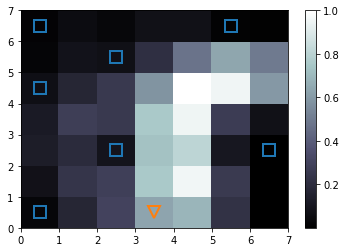

In [26]:
from pylab import plot,axis,show,pcolor,colorbar,bone
bone()
pcolor(som.distance_map().T) # distance map as background
colorbar()
# loading the labels
target = labels
t = np.zeros(len(target),dtype=np.int64)
t[target == 1] = 0
t[target == 2] = 1
t[target == 3] = 2
# use different colors and markers for each label
markers = ['s','v','o']
colors = ['C0','C1','C2']
for cnt,xx in enumerate(data.values):
 w = som.winner(xx) # getting the winner
 # place a marker on the winning position for the sample xx
 plot(w[0]+.5,w[1]+.5,markers[t[cnt]],markerfacecolor='None',
   markeredgecolor=colors[t[cnt]],markersize=12,markeredgewidth=2)
axis([0,som.get_weights().shape[0],0,som.get_weights().shape[1]])
show() 

__This visualisation shows the different nodes from 7*7 grid with different colors for different classes. The nodes belonging to a neuron associated with a class classifies that input data into that class and hence clusters them based on the proximity of the nodes.__